In [1]:
# -*- coding: utf-8 -*-

## Aula 5

Treinar o RidgeRegression e LogisticRegression

#### RidgeRegression

1. Usa o dataset cpu.csv
2. Usa o sklearn.preprocessing.StandardScaler para standardizar os dataset. 
        cpu_dataset.X = StandardScaler fit_transform cpu_dataset.X
3. Divide o dataset em treino e teste
4. Treina o modelo. Qual o score? E o custo?

In [2]:
import numpy as np
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('C:/Users/Asus/si/src/si'), '..')))

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


from src.si.io.csv import read_csv
from src.si.model_selection.split import train_test_split
from src.si.linear_model.ridge_regression import RidgeRegression
from src.si.linear_model.logistic_regression import LogisticRegression



Ponto 1

In [3]:
# importar o dataset

dataset = 'C:/Users/Asus/si/datasets/cpu.csv'

# ler dataset com read csv

cpu = read_csv(dataset, sep=",", label=True, features=True)
cpu.print_dataframe()

,syct,mmin,mmax,cach,chmin,chmax
198,125,256,6000,256,16,128
269,29,8000,32000,32,8,32
220,29,8000,32000,32,8,32
172,29,8000,32000,32,8,32
132,29,8000,16000,32,8,16
...,...,...,...,...,...,...
42,124,1000,8000,0,1,8
46,98,1000,8000,32,2,8
52,125,2000,8000,0,2,14
67,480,512,8000,32,0,0


 Ponto 2

In [4]:
cpu.X = StandardScaler().fit_transform(cpu.X)
cpu.X

array([[-0.30358614, -0.67502598, -0.49546221,  5.69420785,  1.66198873,
         4.23103334],
       [-0.67332952,  1.32629082,  1.72704937,  0.16762947,  0.48550899,
         0.52947875],
       [-0.67332952,  1.32629082,  1.72704937,  0.16762947,  0.48550899,
         0.52947875],
       ...,
       [-0.30358614, -0.2243162 , -0.32449978, -0.62188173, -0.39685082,
        -0.16456273],
       [ 1.06369405, -0.60886675, -0.32449978,  0.16762947, -0.69097076,
        -0.70437278],
       [ 1.06369405, -0.48275071, -0.66642464, -0.62188173, -0.69097076,
        -0.70437278]])

Ponto 3

In [5]:
train, test = train_test_split(cpu)
print('Treino: ', train.shape())
print('Teste: ', test.shape())

Treino:  (168, 6)
Teste:  (41, 6)


In [6]:
train.print_dataframe()

,syct,mmin,mmax,cach,chmin,chmax
34,-0.569339,0.292553,-0.324500,-0.621882,-0.543911,-0.395910
214,-0.630963,1.326291,0.359350,0.167629,0.485509,-0.087447
465,-0.684884,3.393767,1.727049,0.957141,0.485509,0.221016
1150,-0.669478,1.326291,4.462448,2.536163,1.073749,6.081811
32,-0.380616,-0.482751,-0.666425,-0.621882,-0.249791,0.221016
...,...,...,...,...,...,...
32,0.755575,0.292553,-0.324500,-0.621882,-0.543911,-0.665815
10,0.563000,-0.724645,-1.002879,-0.621882,-0.543911,-0.550141
22,-0.245814,-0.224316,-0.666425,-0.424504,-0.543911,0.066784
60,-0.168784,-0.482751,-0.324500,-0.227126,-0.543911,-0.164563


In [7]:
test.print_dataframe()

,syct,mmin,mmax,cach,chmin,chmax
274,-0.688735,-0.402636,-0.784389,2.610180,1.073749,0.221016
30,-0.014724,-0.482751,-0.666425,-0.621882,-0.543911,-0.550141
22,0.485970,-0.482751,-0.666425,-0.621882,-0.249791,-0.473026
915,-0.669478,1.326291,4.462448,1.746652,1.073749,6.081811
16,2.296172,-0.675026,-0.324500,-0.621882,-0.543911,-0.550141
326,-0.638666,1.326291,1.727049,0.957141,0.485509,0.221016
72,-0.272774,-0.482751,-0.324500,-0.399832,-0.249791,-0.241678
6,0.139336,-0.608867,-0.922868,-0.424504,-0.543911,-0.588699
1144,-0.696438,7.528719,4.462448,2.536163,4.014948,1.763330
208,-0.592448,-0.224316,1.727049,0.562385,3.132588,1.300636


Ponto 4

In [8]:
#Treino do modelo
ridge = RidgeRegression(max_iter=2500)
ridge.fit(train)

# teste do modelo
ridge.predict(test)

# score do modelo
print('Score do test: ', ridge.score(test))

#custo 
print('Custo: ', ridge.cost(test))


Score do test:  4635.928999312793
Custo:  4704.195052183103



----------Plot----------


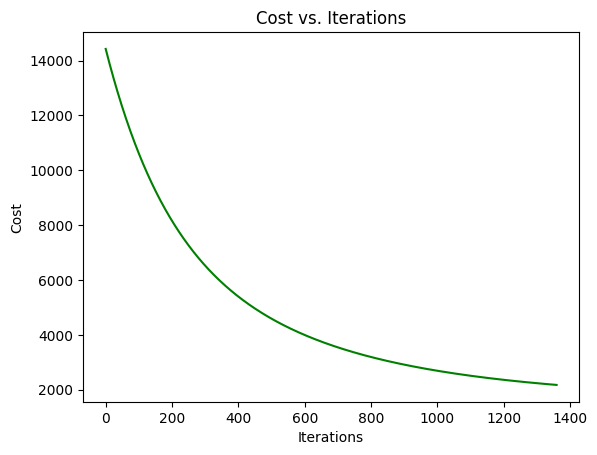

None


In [9]:
print('')
print('----------Plot----------')
print(ridge.lineplot_cost())

In [10]:
print('Cost history: ', ridge.cost_history)

Cost history:  {0: 14426.347830393011, 1: 14378.842069141107, 2: 14331.558917433293, 3: 14284.497202024313, 4: 14237.655756150485, 5: 14191.033419493187, 6: 14144.629038142692, 7: 14098.441464562118, 8: 14052.469557551625, 9: 14006.712182212827, 10: 13961.168209913334, 11: 13915.836518251586, 12: 13870.715991021836, 13: 13825.805518179306, 14: 13781.103995805617, 15: 13736.610326074335, 16: 13692.323417216767, 17: 13648.242183487906, 18: 13604.365545132632, 19: 13560.692428352015, 20: 13517.221765269884, 21: 13473.952493899576, 22: 13430.883558110814, 23: 13388.013907596845, 24: 13345.342497841732, 25: 13302.868290087796, 26: 13260.590251303332, 27: 13218.507354150406, 28: 13176.618576952911, 29: 13134.92290366475, 30: 13093.419323838261, 31: 13052.106832592728, 32: 13010.984430583167, 33: 12970.051123969219, 34: 12929.305924384284, 35: 12888.747848904719, 36: 12848.37592001937, 37: 12808.18916559912, 38: 12768.186618866715, 39: 12728.36731836669, 40: 12688.73030793554, 41: 12649.27463

#### LogisticRegression

1. Usa o dataset breast bin.csv
2. Usa o sklearn.preprocessing.StandardScaler para standardizar os dataset. 
        breast_dataset.X = StandardScaler fit_transform breast_dataset.X
3. Divide o dataset em treino e teste
4. Treina o modelo. Qual o score? E o custo?

Ponto 1

In [11]:
# importar o dataset

dataset = 'C:/Users/Asus/si/datasets/breast-bin.csv'

# ler dataset com read csv

breast = read_csv(dataset, sep=",", label=True, features=True)
breast.print_dataframe()

,8.000000000000000000e+00,4.000000000000000000e+00,4.000000000000000000e+00.1,1.000000000000000000e+00,2.000000000000000000e+00,9.000000000000000000e+00,3.000000000000000000e+00,3.000000000000000000e+00.1,1.000000000000000000e+00.1
0.0,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
0.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0
0.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1.0,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0
0.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
0.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0
0.0,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
0.0,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0
0.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0


Ponto 2

In [12]:
breast.X = StandardScaler().fit_transform(breast.X)
breast.X

array([[ 0.20885295, -0.69912815, -0.74242297, ..., -1.0000359 ,
        -0.61132565, -0.34418721],
       [-0.8578253 , -0.69912815, -0.74242297, ..., -0.58991542,
        -0.61132565, -0.34418721],
       [-0.8578253 , -0.69912815, -0.74242297, ..., -0.17979494,
        -0.61132565, -0.34418721],
       ...,
       [ 0.20885295, -0.37139715, -0.40592217, ..., -1.0000359 ,
        -0.61132565,  0.23892607],
       [-0.8578253 , -0.04366616, -0.40592217, ..., -0.17979494,
        -0.61132565, -0.34418721],
       [ 0.91997179,  0.93952681,  0.94008103, ...,  1.46068699,
        -0.61132565, -0.34418721]])

Ponto 3

In [13]:
train_b, test_b = train_test_split(breast)
print('Treino: ', train_b.shape())
print('Teste: ', test_b.shape())

Treino:  (559, 9)
Teste:  (139, 9)


In [14]:
train_b.print_dataframe()

,8.000000000000000000e+00,4.000000000000000000e+00,4.000000000000000000e+00.1,1.000000000000000000e+00,2.000000000000000000e+00,9.000000000000000000e+00,3.000000000000000000e+00,3.000000000000000000e+00.1,1.000000000000000000e+00.1
0.0,-1.213385,-0.699128,-0.742423,-0.633883,-0.550074,-0.685447,-0.179795,-0.611326,-0.344187
1.0,0.208853,0.284065,0.940081,2.518969,-0.550074,1.803558,0.230326,-0.611326,-0.344187
0.0,-0.146706,-0.699128,-0.742423,-0.633883,-0.550074,-0.685447,-0.589915,-0.611326,-0.344187
1.0,0.919972,-0.043666,0.267079,0.417068,-0.098366,-0.132335,-0.179795,-0.283847,3.154493
0.0,-1.213385,-0.371397,-0.742423,0.066751,-0.550074,-0.685447,-1.000036,-0.283847,-0.344187
...,...,...,...,...,...,...,...,...,...
1.0,1.986650,0.611796,1.276582,0.066751,-0.098366,0.973890,-0.179795,0.043633,3.737606
0.0,0.208853,-0.699128,-0.742423,1.117701,-0.098366,-0.685447,-0.589915,-0.611326,-0.344187
0.0,-1.213385,-0.699128,-0.405922,-0.283566,-0.550074,-0.685447,-0.179795,-0.611326,-0.344187
0.0,-0.502266,-0.699128,-0.742423,-0.633883,-1.001782,-0.685447,-1.000036,-0.611326,-0.344187


In [15]:
test_b.print_dataframe()

,8.000000000000000000e+00,4.000000000000000000e+00,4.000000000000000000e+00.1,1.000000000000000000e+00,2.000000000000000000e+00,9.000000000000000000e+00,3.000000000000000000e+00,3.000000000000000000e+00.1,1.000000000000000000e+00.1
0.0,-0.146706,0.284065,0.267079,0.417068,1.256757,0.420777,1.460687,0.043633,-0.344187
1.0,0.208853,2.250451,2.286084,2.518969,1.256757,1.803558,1.050567,0.698591,0.238926
0.0,0.208853,-0.371397,0.267079,-0.633883,-1.001782,-0.685447,-1.000036,-0.611326,-0.344187
0.0,0.564412,-0.699128,-0.742423,-0.633883,-0.550074,-0.685447,-0.589915,-0.611326,-0.344187
0.0,-0.502266,-0.699128,-0.742423,-0.633883,-0.550074,-0.685447,-1.000036,-0.611326,-0.344187
...,...,...,...,...,...,...,...,...,...
0.0,-0.502266,-0.371397,-0.405922,-0.283566,-0.550074,-0.685447,0.230326,-0.283847,-0.344187
1.0,-0.857825,0.611796,-0.069421,0.066751,1.256757,0.973890,1.460687,0.698591,-0.344187
0.0,-0.502266,-0.699128,-0.742423,-0.633883,-0.550074,-0.685447,-0.589915,-0.611326,-0.344187
0.0,-0.502266,-0.699128,-0.742423,-0.633883,-0.550074,0.420777,-1.000036,-0.611326,-0.344187


Ponto 4

In [16]:
#Treino do modelo
logi = LogisticRegression()
logi.fit(train_b)

# teste do modelo
logi.predict(test_b)

# score do modelo
print('Score do test: ', logi.score(test_b))

#custo 
print('Custo: ', logi.cost(test_b))



Score do test:  0.9856115107913669
Custo:  0.2739119001974842



----------Plot----------


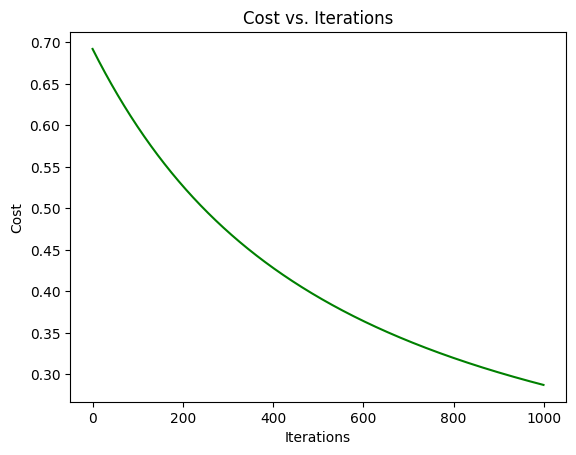

None


In [17]:
print('')
print('----------Plot----------')
print(logi.lineplot_cost())

In [18]:
print('Cost history: ', logi.cost_history)

Cost history:  {0: 0.6920657964341752, 1: 0.6909875132425687, 2: 0.6899123218907625, 3: 0.6888402132894723, 4: 0.6877711783547753, 5: 0.6867052080083895, 6: 0.6856422931779532, 7: 0.6845824247972977, 8: 0.6835255938067214, 9: 0.6824717911532592, 10: 0.6814210077909502, 11: 0.6803732346811019, 12: 0.6793284627925532, 13: 0.6782866831019337, 14: 0.6772478865939214, 15: 0.676212064261496, 16: 0.6751792071061928, 17: 0.67414930613835, 18: 0.6731223523773568, 19: 0.6720983368518973, 20: 0.6710772506001917, 21: 0.6700590846702359, 22: 0.6690438301200369, 23: 0.6680314780178477, 24: 0.6670220194423975, 25: 0.6660154454831205, 26: 0.665011747240382, 27: 0.6640109158257013, 28: 0.6630129423619728, 29: 0.6620178179836836, 30: 0.6610255338371297, 31: 0.6600360810806276, 32: 0.6590494508847261, 33: 0.6580656344324124, 34: 0.6570846229193182, 35: 0.656106407553922, 36: 0.6551309795577488, 37: 0.6541583301655663, 38: 0.6531884506255826, 39: 0.6522213321996344, 40: 0.6512569661633796, 41: 0.650295343